<a href="https://colab.research.google.com/github/raynardj/torchember/blob/master/nb_test/torchember_instant_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TorchEmber 1 minute tutorial
> 1 minute is more than enough to figure out what torchember is about

## How do I read this doc in 1 minute

Most of the code I stole from this [pytorch official tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py), and insert some [TorchEmber](https://github.com/raynardj/torchember) code. So 95% of code/markdowns in this notebook are "borrowed", hence has nothing to do with the tool I'm tring to demonstrate.

To read this tutorial fast: 

```python 
# ================== TorchEmber Code Here ==================
```
is about TorchEmber code

Well, you have to install torchember. By default, it won't ensure your installation of pytorch in requirements

In [0]:
# ================== TorchEmber Code Here ==================
!pip install torchember>=0.2.7

In [0]:
%matplotlib inline


### Training a Classifier
This is a CIFAR 10 dataset classifier, the original author did fine job making a clear demonstration on pytorch practice, which I only changed the batch size



In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

### Data preprocessing pipeline


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



 ship truck   cat   dog


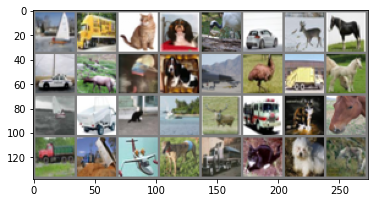

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


from torchember.core import torchEmber # ================== TorchEmber Code Here ==================
te = torchEmber(net) # ================== TorchEmber Code Here ==================

start analyzing model


### Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.

In [0]:
CUDA = torch.cuda.is_available()
if CUDA:
    net.cuda()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

This part of code is also borrow, we do have to do some training for tracking gradients.

If you get bored waiting, just interupt the training half way


In [0]:
for epoch in range(2):  # loop over the dataset multiple times

    # torchEmber.mark(**kwargs)  is for separating log files, 
    # you can define the key and value freely to fit your purpose
    # for example, you can use this like 
    # te.mark(status = "train", epo = "epoch", gan = "discriminator")
    
    te.mark(state = "train",epoch = epoch) # ================== TorchEmber Code Here ==================
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # using log model after backward()/ before next iter's zero_grad()
        # hence we can observe on gradient data
        te.log_model() # ================== TorchEmber Code Here ==================

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


## Visualize the trackings

In [0]:
# ================== TorchEmber Code Here ==================
from torchember.visual import VisualByTensor

In [0]:
# ================== TorchEmber Code Here ==================
vis = VisualByTensor()

interactive(children=(Dropdown(description='task', options=('Net_20200412_135113',), value='Net_20200412_13511…

In [0]:
vis.scatter_cols(vis.ember_sub_df)